In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 98% !important }<style>"))

In [2]:
from utilities import *

In [3]:
import joblib
from sklearn.linear_model import LinearRegression

In [4]:
ble = read_ble('../Data/ble.csv')
pin = read_pin('../Data/pin.csv')

In [5]:
data = read_data('../Data/rssi5.csv')
data

All beacons: ['0117C55D14E4']
Selecting all


,time,location,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,2019-12-02 01:05:32.956,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-02 01:05:32.976,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-82.0,NaN,NaN,NaN,NaN
2,2019-12-02 01:05:33.015,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-02 01:05:33.034,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-79.0,NaN,NaN,NaN,NaN
4,2019-12-02 01:05:33.096,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-68.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49658,2019-12-12 01:47:54.481,V1_26,-69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49659,2019-12-12 01:47:54.683,V1_26,NaN,NaN,NaN,-77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49660,2019-12-12 01:47:54.736,V1_26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49661,2019-12-12 01:47:54.772,V1_26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.0,NaN,NaN,NaN,NaN


In [6]:
data.describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
count,3219.000000,3140.000000,2388.000000,3396.000000,3168.00000,3347.000000,3461.000000,3819.000000,4928.000000,2340.000000,3180.000000,3074.000000,3378.000000,3859.000000,3303.000000,2179.000000,3539.000000
mean,-73.690587,-75.852229,-78.738693,-74.426090,-73.75221,-74.488198,-74.709910,-74.323907,-74.847606,-77.913675,-76.730503,-71.864021,-70.016578,-77.665976,-74.789888,-82.200092,-75.846284
std,9.114148,7.819308,7.226973,8.547303,6.85638,9.399487,9.328878,8.794766,11.817300,10.787317,11.082408,7.843639,7.820746,9.233429,8.581709,8.102045,8.108478
min,-97.000000,-98.000000,-97.000000,-98.000000,-97.00000,-98.000000,-97.000000,-97.000000,-98.000000,-98.000000,-98.000000,-96.000000,-96.000000,-98.000000,-98.000000,-98.000000,-98.000000
25%,-80.000000,-82.000000,-84.000000,-80.250000,-78.00000,-82.000000,-83.000000,-82.000000,-83.000000,-87.000000,-87.000000,-77.000000,-75.000000,-87.000000,-81.000000,-89.000000,-82.000000
50%,-72.000000,-75.000000,-79.000000,-75.000000,-73.00000,-73.000000,-75.000000,-73.000000,-75.000000,-80.000000,-76.000000,-72.000000,-70.000000,-75.000000,-75.000000,-83.000000,-75.000000
75%,-68.000000,-69.000000,-73.000000,-67.000000,-68.00000,-67.000000,-67.000000,-67.000000,-69.000000,-68.000000,-67.000000,-67.000000,-64.000000,-69.000000,-69.000000,-75.000000,-69.000000
max,-56.000000,-63.000000,-64.000000,-58.000000,-59.00000,-55.000000,-53.000000,-61.000000,-49.000000,-58.000000,-52.000000,-55.000000,-54.000000,-62.000000,-56.000000,-66.000000,-60.000000


In [7]:
data.sort_values("time", inplace=True)
data_rolled = data.groupby("location").rolling(30, min_periods=1).mean().reset_index()

In [8]:
data_imputed = data_rolled.set_index("location").groupby("location").ffill()
data_imputed.fillna(-100, inplace=True)
data_imputed.reset_index(inplace=True)

In [9]:
data_imputed

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_10,30171,-100.0,-100.0,-100.0,-100.000000,-100.0,-100.0,-100.0,-100.000000,-100.0,-100.0,-89.000000,-100.00,-100.000000,-100.0,-100.0,-100.0,-100.0
1,V1_10,30172,-100.0,-100.0,-100.0,-100.000000,-100.0,-100.0,-82.0,-100.000000,-100.0,-100.0,-89.000000,-100.00,-100.000000,-100.0,-100.0,-100.0,-100.0
2,V1_10,30173,-68.0,-100.0,-100.0,-100.000000,-100.0,-100.0,-82.0,-100.000000,-100.0,-100.0,-89.000000,-100.00,-100.000000,-100.0,-100.0,-100.0,-100.0
3,V1_10,30174,-68.0,-100.0,-100.0,-100.000000,-100.0,-100.0,-82.0,-84.000000,-100.0,-100.0,-89.000000,-100.00,-100.000000,-75.0,-100.0,-100.0,-100.0
4,V1_10,30175,-68.0,-100.0,-100.0,-100.000000,-100.0,-100.0,-82.0,-84.000000,-100.0,-100.0,-89.000000,-100.00,-66.000000,-75.0,-100.0,-100.0,-100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49658,V1_9,43166,-74.0,-83.0,-78.0,-63.333333,-71.0,-87.0,-92.0,-62.750000,-91.0,-89.0,-89.666667,-66.75,-75.500000,-71.5,-76.0,-92.5,-75.0
49659,V1_9,43167,-74.0,-83.0,-78.0,-63.333333,-71.0,-87.0,-92.0,-62.750000,-91.0,-89.0,-89.666667,-66.75,-75.500000,-71.5,-76.0,-93.0,-75.0
49660,V1_9,43168,-74.0,-83.0,-78.0,-63.333333,-71.0,-87.0,-92.0,-62.666667,-91.0,-89.0,-89.666667,-66.75,-74.666667,-71.5,-76.0,-93.0,-75.0
49661,V1_9,43169,-74.0,-83.0,-78.0,-63.333333,-71.0,-87.0,-92.0,-62.750000,-91.0,-89.0,-89.666667,-67.00,-74.666667,-71.5,-76.0,-93.0,-75.0


In [10]:
data_imputed[scanners] = min_max_scaling(data_imputed[scanners])

In [11]:
data_imputed["X"] = data_imputed["location"].apply(lambda x: pin[x]["X"])
data_imputed["Y"] = data_imputed["location"].apply(lambda x: pin[x]["Y"])

In [12]:
data_imputed

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,...,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C,X,Y
0,V1_10,30171,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.183333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,11.17660,5.29753
1,V1_10,30172,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,...,0.000000,0.183333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,11.17660,5.29753
2,V1_10,30173,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,...,0.000000,0.183333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,11.17660,5.29753
3,V1_10,30174,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.266667,...,0.000000,0.183333,0.000000,0.000000,0.416667,0.0,0.000000,0.000000,11.17660,5.29753
4,V1_10,30175,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.266667,...,0.000000,0.183333,0.000000,0.566667,0.416667,0.0,0.000000,0.000000,11.17660,5.29753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49658,V1_9,43166,0.433333,0.283333,0.366667,0.611111,0.483333,0.216667,0.133333,0.620833,...,0.183333,0.172222,0.554167,0.408333,0.475000,0.4,0.125000,0.416667,8.17867,5.28213
49659,V1_9,43167,0.433333,0.283333,0.366667,0.611111,0.483333,0.216667,0.133333,0.620833,...,0.183333,0.172222,0.554167,0.408333,0.475000,0.4,0.116667,0.416667,8.17867,5.28213
49660,V1_9,43168,0.433333,0.283333,0.366667,0.611111,0.483333,0.216667,0.133333,0.622222,...,0.183333,0.172222,0.554167,0.422222,0.475000,0.4,0.116667,0.416667,8.17867,5.28213
49661,V1_9,43169,0.433333,0.283333,0.366667,0.611111,0.483333,0.216667,0.133333,0.620833,...,0.183333,0.172222,0.550000,0.422222,0.475000,0.4,0.116667,0.416667,8.17867,5.28213


In [13]:
def plot_RSSI_Coor(data, coor, scanner):
#     for loc in data['location'].unique():
#         plt.scatter(data[data['location'] == loc][coor], data[data['location'] == loc][scanner], alpha=1, label=loc)
    plt.scatter(data[coor], data[scanner], alpha=0.1)
    plt.xlabel(coor)
    plt.ylabel('RSSI')
    plt.title('{}\nLocation: ({:.2f}, {:.2f})'.format(scanner, ble[scanner]['X'], ble[scanner]['Y']))
    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

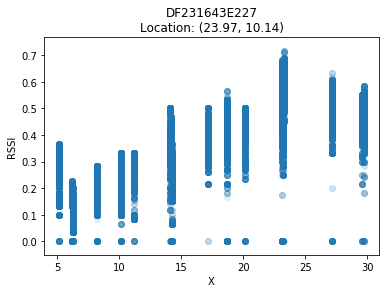

In [14]:
plot_RSSI_Coor(data_imputed, 'X', 'DF231643E227')

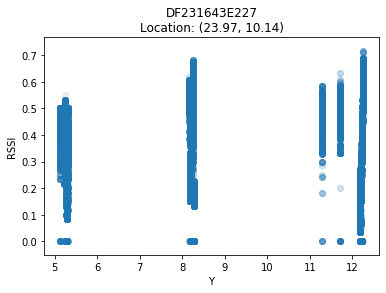

In [15]:
plot_RSSI_Coor(data_imputed, 'Y', 'DF231643E227')

In [16]:
R1824 = data_imputed[['DF231643E227', 'X', 'Y']].copy()

In [17]:
dx = R1824['X'] - ble['DF231643E227']['X']
dy = R1824['Y'] - ble['DF231643E227']['Y']
R1824['D'] = np.sqrt(np.square(dx) + np.square(dy))

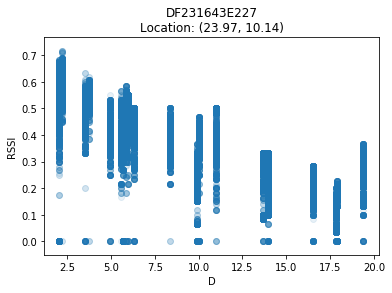

In [18]:
plot_RSSI_Coor(R1824, 'D', 'DF231643E227')

In [19]:
reg = LinearRegression()
reg.fit(R1824['D'].values.reshape((-1,1)), R1824['DF231643E227'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

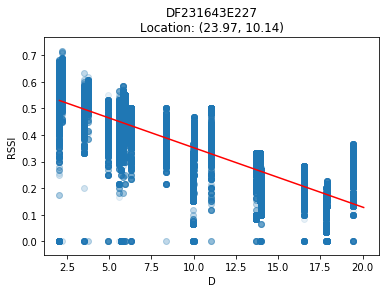

In [20]:
plot_RSSI_Coor(R1824, 'D', 'DF231643E227')
x = np.arange(R1824['D'].min(), R1824['D'].max() + 1).reshape((-1,1))
plt.plot(x, reg.predict(x), c='r')

In [21]:
for s in scanners:
    scanner = data_imputed[[s, 'X', 'Y']].copy()
    dx = scanner['X'] - ble[s]['X']
    dy = scanner['Y'] - ble[s]['Y']
    scanner['D'] = np.sqrt(np.square(dx) + np.square(dy))
    reg = LinearRegression()
    reg.fit(scanner['D'].values.reshape((-1,1)), scanner[s])
    joblib.dump(reg, '../Models/linear_distance_models/{}.joblib'.format(s))